In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instagram-data/Instagram data.csv


# I. Introduction

Exploratory Data Analysis (EDA) is a fundamental aspect of Data Science, involving the thorough examination of a dataset to unveil underlying patterns, trends, and associations. This process enhances our comprehension of the dataset's content and aids in making informed choices and devising effective approaches for addressing tangible business challenges. In this notebook, I will lead you through a practical application of Exploratory Data Analysis utilizing the Python programming language.

To begin with the EDA process, I will use the dataset about Instagram Reach and this dataset could be found [HERE](https://statso.io/instagram-reach-analysis-case-study/).

Overall, the dataset consists of the total of 119 rows and 13 columns with the column details as the following:

1. Impressions: Count of post views (Reach)
2. Home Reach: Reach originating from the home feed
3. Hashtag Reach: Reach resulting from hashtags
4. Explore Reach: Reach generated by appearing on the Explore page
5. Other Reach: Reach from sources other than the aforementioned
6. Saves: Total saves of the post
7. Comments: Total comment count
8. Shares: Total number of shares
9. Likes: Total number of likes received
10. Profile Visits: Count of visits to the profile via the post
11. Follows: Number of new followers gained through the post
12. Caption: Text accompanying the post
13. Utilized Hashtags: Hashtags employed in the post

Disclaimer: This notebook is for my learning and practice purpose only, and the source code I run here is referenced from [THIS GUIDE](https://thecleverprogrammer.com/2023/05/30/exploratory-data-analysis-using-python/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# II. Exploratory Data Analysis (EDA)

First thing first, we begin the process with loading the dataset into this notebook.

In [3]:
#Loading the Dataset of Instagram Data to the Workbook

df = pd.read_csv("/kaggle/input/instagram-data/Instagram data.csv", encoding = 'latin-1')
df

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


We want to check the total columns inside this dataset in order to observe what are those columns all about. After performing the script, we can see that there are 13 columns in the dataset starting from 'Impression', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'Caption', 'Hashtags'

In [4]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

The dataset contains 119 records in each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


After checking the dataset, we also continue to observe the descriptive statistics of the Instagram Reach. From the below result, it could be seen that:

- The average number of Impressions is around 5704, indicating the typical reach of a post
- Impressions have a relatively high standard deviation of 4844, suggesting a wide variation in the reach of different posts
- The minimum Impressions value is 1941, and the maximum is 36919, showcasing the range of reach values
- The metrics for reach from different sources show varying average values
- Reach from Home is generally higher than reach from other sources
- Reach from Hashtags and Reach from Explore have lower averages but considerable variability
- On average, posts receive about 153 saves, 6 comments, 9 shares, 173 likes, 50 profile visits and 20 new follows.
- There is significant variability in the number of profile visits and likes, as indicated by their high deviations
- The metrics seem to follow a distribution with some skewness to the right (positively skewed), especially evident in the large maximum values compared to the median values
- Higher quartile values (75th percentile) are generally higher than lower quartile values (25th percentile), indicating that many posts have higher engagement.
- There are posts with very low engagement (e.g., minimum Shares, minimum Likes), which might indicate less engaging content or limited reach.
- Some posts have exceptionally high engagement (e.g., maximum Likes), suggesting highly appealing content.
- The number of new follows gained through posts varies, with an average of around 20.76.
- Profile visits from posts also vary, with an average of approximately 50.62.

In [6]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


Before continuing the process, we have to check is the dataset has any missing or null value. Fortunately, there is no null value in this dataset.

In [7]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

### Distribution of Impressions

We want to observe the reach of the Instagram post within this dataset, hence by plotting the Distribution of Impressions, we can see that the histogram represents the right skewed. This right skewed histogram indicates that the majority of the posts have relatively lower Impressions, with a small number of posts managing to achieve high Impressions counts.

In [8]:
plot = px.histogram(df, 
                   x='Impressions',
                   nbins=10, 
                   title='Distribution of Impressions')
plot.update_traces(marker_color='#2F6D80')
plot.show()

### Scatter Plot of Impressions vs Likes

By obsesrving the relationships between the post Impressions and Likes, it could be seen that there is a positive correlation between Impressions and Likes count of the posts. As the number of Impressions increases, there is a tendency for the number of Likes to also increase.

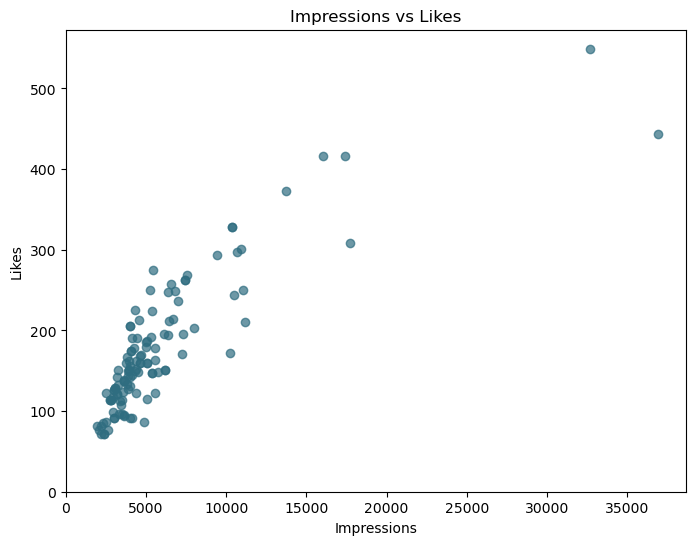

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Impressions"], df["Likes"], alpha=0.7, color='#2F6D80')
plt.xlabel("Impressions")
plt.ylabel("Likes")
plt.title("Impressions vs Likes")
plt.xlim(0)
plt.ylim(0)
plt.show()

### Impressions Over the Period of Time



In [10]:
plt = px.line(df, x= df.index, 
              y='Impressions', 
              title='Impressions Over Time')
plt.update_traces(line=dict(color='#2F6D80'))
plt.show()

### Trend of Likes, Saves, Follows Over Time

In [11]:
plt = go.Figure()

plt.add_trace(go.Scatter(x=df.index, y=df['Likes'], name='Likes', line=dict(color='#6AA4B0')))
plt.add_trace(go.Scatter(x=df.index, y=df['Saves'], name='Saves', line=dict(color='#C59894')))
plt.add_trace(go.Scatter(x=df.index, y=df['Follows'], name='Follows', line=dict(color='#b39700')))

plt.update_layout(title='Number of Likes, Saves, Follows Over Time',
                  xaxis_title='Date',
                  yaxis_title='Total')

plt.show()

### Propotion of Reach from Different Sources

Based on the following pie chart, it could be seen that the pie plot illustrates the distribution of reach for Instagram posts orignating from different sources. The breakdown of reach distribution is as follows:

- Reach From Home constitutes the largest propotion at 44.1% of the total sources which is equivalent to 294,619
- Reach generated through the use of hashtags contributes significantly at 33.6%
- Posts gaining visibility from the Explore page and other sources represent 19.2% and 3.05% of the overall reach, respectively.

This distribution sheds light on the varying impact of different sources on post reach. The dominant share of reach from the user's home feed implies that a substantial portion of the audience is engaging with posts directly through their feeds. The significance of reach through hashtags highlights the effectiveness of strategic tagging in broadening the post's audience. Moreover, the portion of reach originating from the Explore page and other sources underscores the role of Instagram's algorithm in curating content for users beyond their immediate network.


In [12]:
reach_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
reach_counts = [df[source].sum() for source in reach_sources]

colors = ['#173640', '#2F6D80', '#82a7b2', '#bcbcbc']

plt = px.pie(data_frame=df, names=reach_sources, 
             values=reach_counts, 
             title='Reach from Different Sources',
             color_discrete_sequence=colors)
plt.show()

### Propotion of Engagement Sources for the Instagram Posts

After observing the various sources of post reach, we also want to examine the engagement sources of the Instagram posts that the users made. From this plot, we can conclude that:

- Among the Instagram post that the users post, Likes account for the dominant share engagement, constitution a substantial 50.6% (20,680 engagements) of the overall distribution.
- Significant Engagement by Saves: The engagement metric of Saves also contributes significantly to the overall post engagement, representing 44.7% of the total. This suggests that users find value in the content posted, often saving it for future reference or re-viewing.
- On the other hand, engagement through post Shares and Comments is comparatively lower, collectively accounting for less than 3% of the total engagement.

Hence, the pie chart underscores the central role of Likes and Saves in driving engagement for Instagram posts. While likes indicate overall approval and agreement with the content, saves point towards content that is considered valuable or informative. The relatively lower engagement from shares and comments might imply that users are more inclined to passive forms of interaction, such as liking and saving, rather than actively engaging in discussions or sharing content.

In [13]:
engagement_metrics = ['Saves', 'Comments', 'Shares', 'Likes']
engagement_counts = [df[metric].sum() for metric in engagement_metrics]

colors = ['#675600', '#9a8100', '#b3aa7f', '#d0d0d0']

plt = px.pie(data_frame=df, names=engagement_metrics, 
             values=engagement_counts, 
             title='Engagement Sources',
             color_discrete_sequence=colors)
plt.show()

### Correlation Between Profile Visits and Follows

In this section, we want to analyze if there is any correlation of the Profile Visits that could lead to Follows. From the plot below, it is obvious that there is a positive correlation between the Instagram users' Profile Visits and Follows. As the number of Profile Visits increase, there is also a high tendency that the number of Follows also increase.

In [14]:
plot = px.scatter(df, x='Profile Visits', y='Follows', trendline='ols',
                  title='Profile Visits vs. Follows')


color_map = {'Profile Visits': '#2F6D80', 'Follows': '#2F6D80'}
plot.update_traces(marker=dict(color=color_map['Profile Visits']))
plot.update_traces(line=dict(color=color_map['Follows']))

plot.update_layout(xaxis_title='Profile Visits', yaxis_title='Follows')


plot.update_xaxes(range=[0, max(df['Profile Visits'])])
plot.update_yaxes(range=[0, max(df['Follows'])])

plot.show()

### Number of Hashtags Used

We have constructed a bar graph depicting the frequency of hashtags used, aiming to discern the prevailing hashtags within the posts. The visualization reveals that the hashtags *'#thecleverprogrammer'* and *'#amankharwal'* emerge as the most prominently utilized ones.

In [15]:
# Create a list to store all hashtags
all_hashtags = []

# Iterate through each row in the 'Hashtags' column
for row in df['Hashtags']:
    hashtags = str(row).split()
    hashtags = [tag.strip() for tag in hashtags]
    all_hashtags.extend(hashtags)

# Create a pandas DataFrame to store the hashtag distribution
hashtag_distribution = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_distribution.columns = ['Hashtag', 'Count']

plt = px.bar(hashtag_distribution, x='Hashtag', 
             y='Count', title='Number of Hashtags Used')
plt.update_traces(marker_color='#2F6D80')
plt.show()

### Number of Likes and Impressions by Hashtags

In this part, we aim to see which hashtags could get most Likes and Impressions. Based on the analysis, we could see that the hashtags *'#thecleverprogrammer'* and *'#amankharwal'* are the top hashtags that could get most Likes and Impressions as both hashtags could get equally 20.462K and reach 672.166K Impressions compare to other hashtags.

In [16]:
# Create a dictionary to store the likes and impressions for each hashtag
hashtag_likes = {}
hashtag_impressions = {}

# Iterate through each row in the dataset
for index, row in df.iterrows():
    hashtags = str(row['Hashtags']).split()
    for hashtag in hashtags:
        hashtag = hashtag.strip()
        if hashtag not in hashtag_likes:
            hashtag_likes[hashtag] = 0
            hashtag_impressions[hashtag] = 0
        hashtag_likes[hashtag] += row['Likes']
        hashtag_impressions[hashtag] += row['Impressions']

# Create a DataFrame for likes distribution
likes_distribution = pd.DataFrame(list(hashtag_likes.items()), columns=['Hashtag', 'Likes'])

# Create a DataFrame for impressions distribution
impressions_distribution = pd.DataFrame(list(hashtag_impressions.items()), columns=['Hashtag', 'Impressions'])

plt_likes = px.bar(likes_distribution, x='Hashtag', y='Likes', 
                   title='Likes Distribution for Each Hashtag')

plt_impressions = px.bar(impressions_distribution, x='Hashtag', 
                         y='Impressions', 
                         title='Impressions Distribution for Each Hashtag')

plt_likes.update_traces(marker_color='#2F6D80')
plt_impressions.update_traces(marker_color='#2F6D80')

plt_likes.show()
plt_impressions.show()

# III. Summary

To sum up, the EDA of this dataset has revealed key insights as follows:

- Post exhibit a right skewed distribution of Impressions, indicating the most posts receive lower lower Impressions, while a few achieve higher visibility.
- A positive correlation exists between Impressions and Likes, suggesting higher visibility contributes to increased user engagement.
- The majority of post reach originates from users' home feeds (44.1%), with hashtags contributing significantly (33.6%). Explore and other sources collectively make up the remaining reach.
- Likes dominate engagement (50.6%), followed by Saves (44.7%), while Shares and Comments have limited engagement.
- Positive correlation implies that increased profile visits lead to more follows, indicating a relationship between profile visibility and follower growth.
- '#thecleverprogrammer' and '#amankharwal' are frequently used hashtags, likely indicating their popularity.
- '#thecleverprogrammer' and '#amankharwal' secure high Like and Impression counts, signifying their effectiveness in driving engagement and visibility.